# Leaving Certificate - Ireland
## Breakdown of candidates by grade awarded in each subject from 2017 to 2020

### Source: State Examinations Commission https://www.examinations.ie/?l=en&mc=st&sc=r16

### Level: A = HIGHER LEVEL, B = FOUNDATION LEVEL, C = COMMON LEVEL, G = ORDINARY LEVEL

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
years = ['2017','2018','2019','2020']

df = pd.DataFrame()
for year in years:
    file ="Files//" + year + ".xlsx"
    print(f"Reading the file: {file}")
    df = df.append(pd.read_excel(file, usecols=('A:L')))

Reading the file: Files//2017.xlsx
Reading the file: Files//2018.xlsx
Reading the file: Files//2019.xlsx
Reading the file: Files//2020.xlsx


### Let's rename some columns to be easy to interpreted

In [89]:
df.rename(columns = {1: 'H1', 2: 'H2', 3: 'H3', 4: 'H4', 5: 'H5', 6: 'H6', 7: 'H7', 8: 'H8',' Total': 'Total'}, inplace = True)

In [90]:
# Let's use the nomenclature below on column Level
# Level: A = HIGHER LEVEL, B = FOUNDATION LEVEL, C = COMMON LEVEL, G = ORDINARY LEVE
def update_level(level):
    if level == 'A':
        lv = 'Higher'
    elif level == 'B':
        lv = 'Foundation'
    elif level == 'C':
        lv = 'Common'
    elif level == 'G':
        lv = 'Ordinary'      
    else:
        lv = 'Other'
    return lv

df['Level'] = df['Level'].apply(update_level)

In [91]:
df.shape

(274, 12)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 40
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Subject  274 non-null    object 
 1   Level    274 non-null    object 
 2   Year     274 non-null    int64  
 3   Total    274 non-null    int64  
 4   H1       274 non-null    float64
 5   H2       274 non-null    float64
 6   H3       274 non-null    float64
 7   H4       274 non-null    float64
 8   H5       274 non-null    float64
 9   H6       274 non-null    float64
 10  H7       274 non-null    float64
 11  H8       274 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 27.8+ KB


In [93]:
df.describe()

,Year,Total,H1,H2,H3,H4,H5,H6,H7,H8
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,2018.313869,4145.799270,8.058029,14.809489,19.768613,19.286131,16.683212,10.989781,5.321168,5.087226
std,1.032454,7317.953884,10.609072,8.705241,6.082687,6.706114,6.537394,5.743846,3.558603,5.936330
min,2017.000000,11.000000,0.000000,0.000000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,84.000000,1.925000,8.800000,16.200000,15.000000,12.600000,7.725000,2.925000,1.300000
50%,2018.000000,777.000000,4.800000,14.500000,19.900000,20.650000,17.000000,11.400000,4.900000,3.200000
75%,2019.000000,5338.750000,9.800000,18.500000,23.200000,23.950000,20.575000,13.550000,7.175000,6.775000
max,2020.000000,40217.000000,71.600000,46.700000,40.000000,35.100000,37.400000,35.300000,16.700000,40.000000


In [94]:
df[(df['Subject'] == 'ENGLISH') & (df['Level'] == 'Higher')]

,Subject,Level,Year,Total,H1,H2,H3,H4,H5,H6,H7,H8
3,ENGLISH,Higher,2017,38749,2.9,10.7,20.6,26.8,23.3,12.7,2.4,0.6
3,ENGLISH,Higher,2018,38283,2.9,10.0,20.0,27.9,24.2,12.2,2.3,0.5
3,ENGLISH,Higher,2019,40217,2.9,10.0,20.4,27.6,23.8,12.0,2.6,0.6
2,ENGLISH,Higher,2020,294,3.4,10.5,18.4,26.2,20.4,12.6,6.1,2.4


### Observing the values above, we can noticed that there is a pattern in the percentage of grades per Subject.
In English, the *average* of candidates reach the maximun grade (H1) was 3%, following  by\
10% - H2\
20% - H3\
27% - H4\
23% - H5\
12% - H6\
 3% - H7\
 1% - H8

### Let´s check some grades from 2017 to 2020 from Higher Level

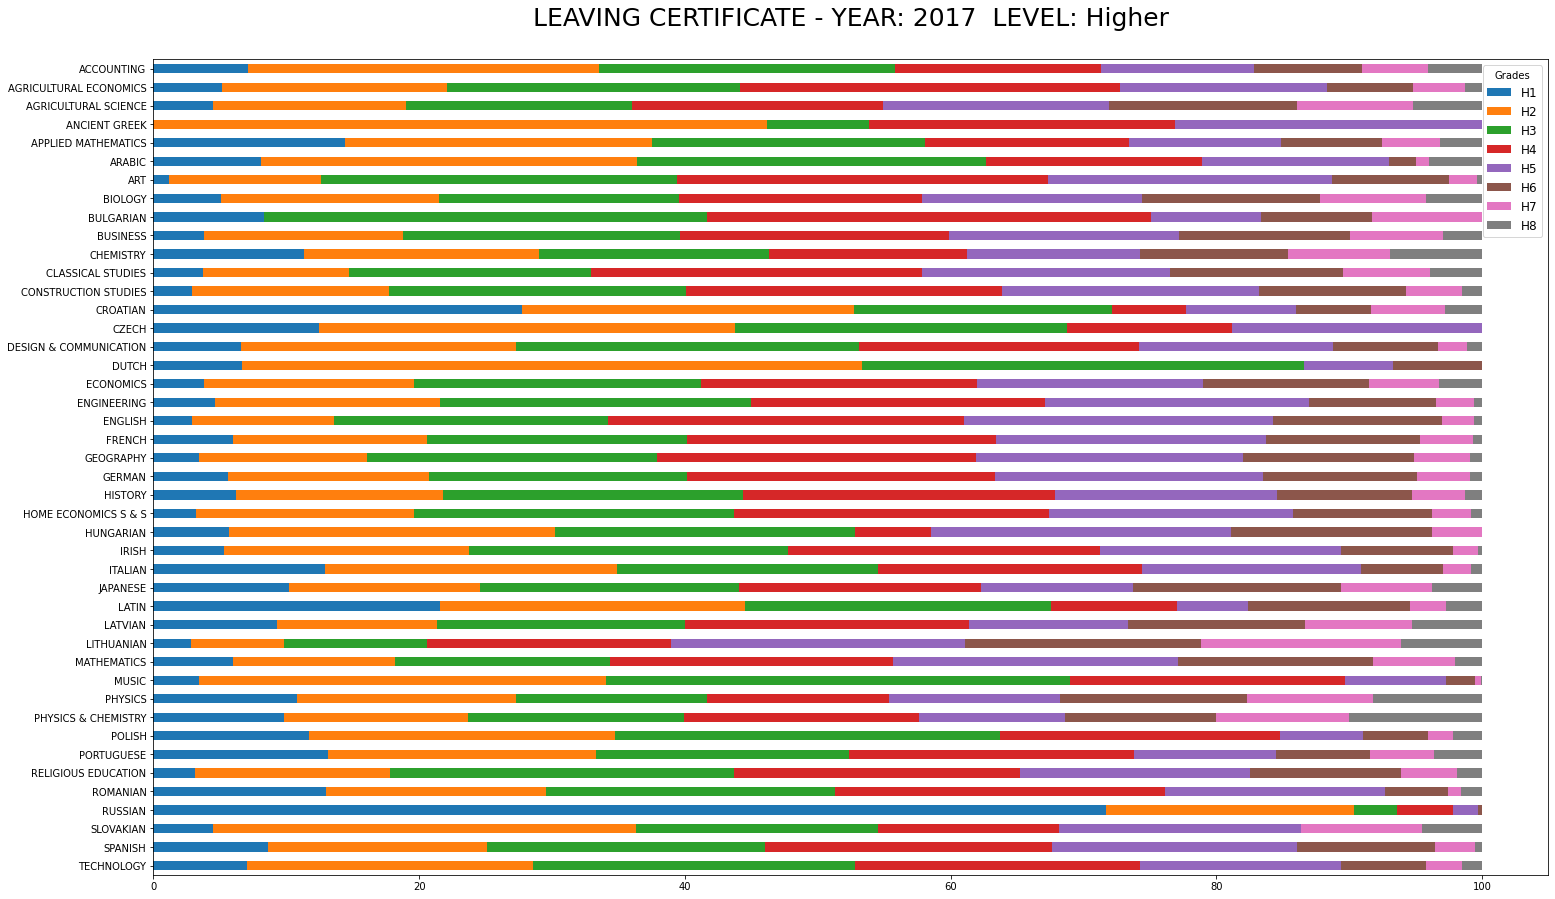

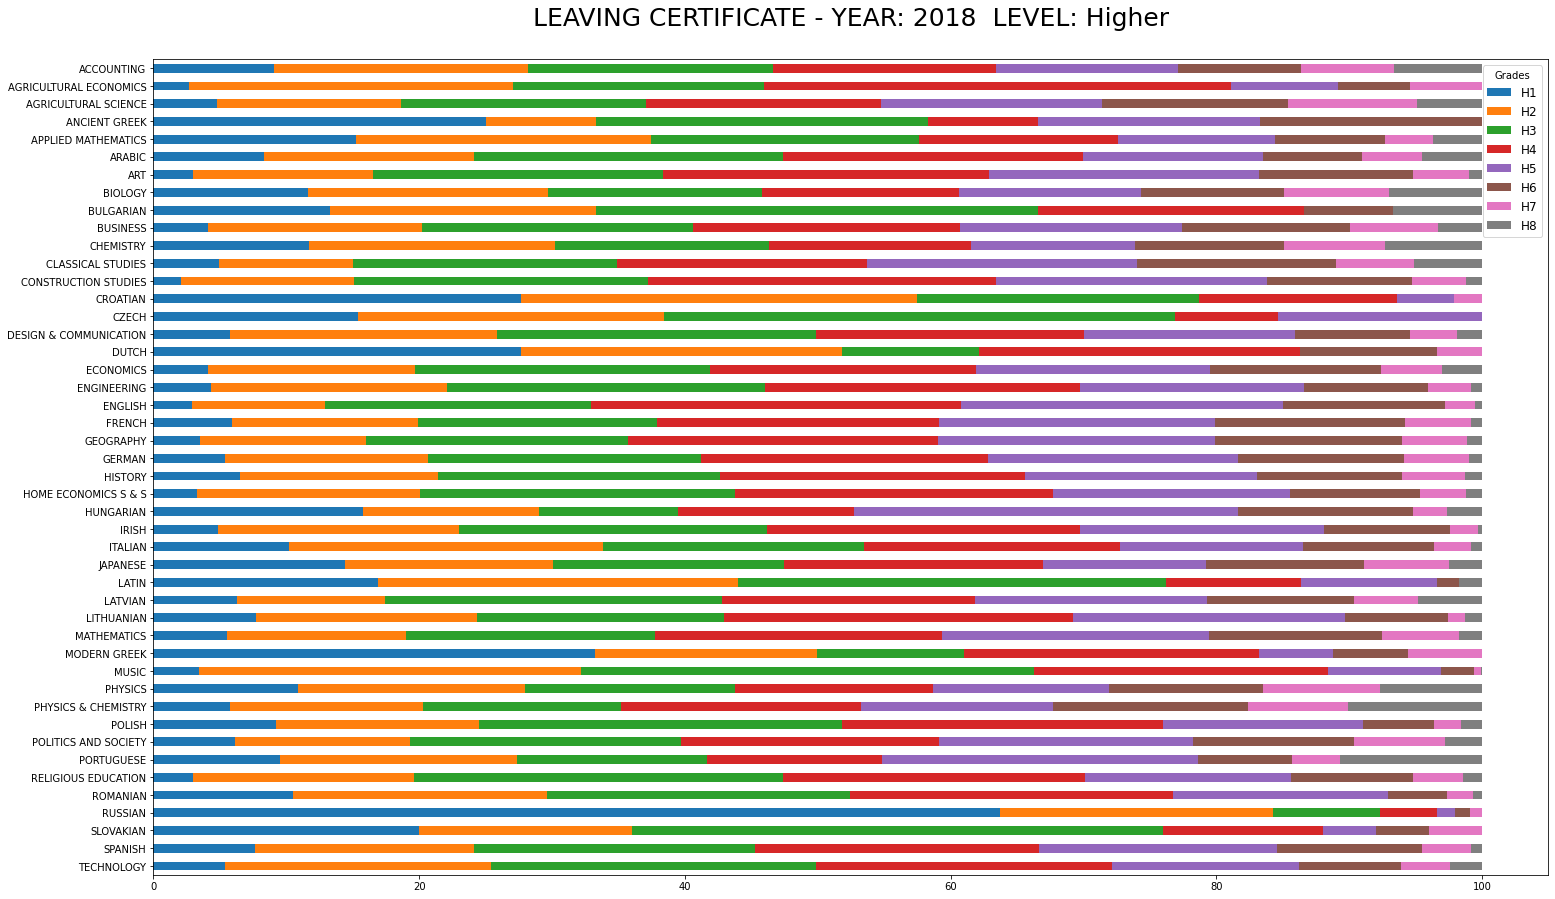

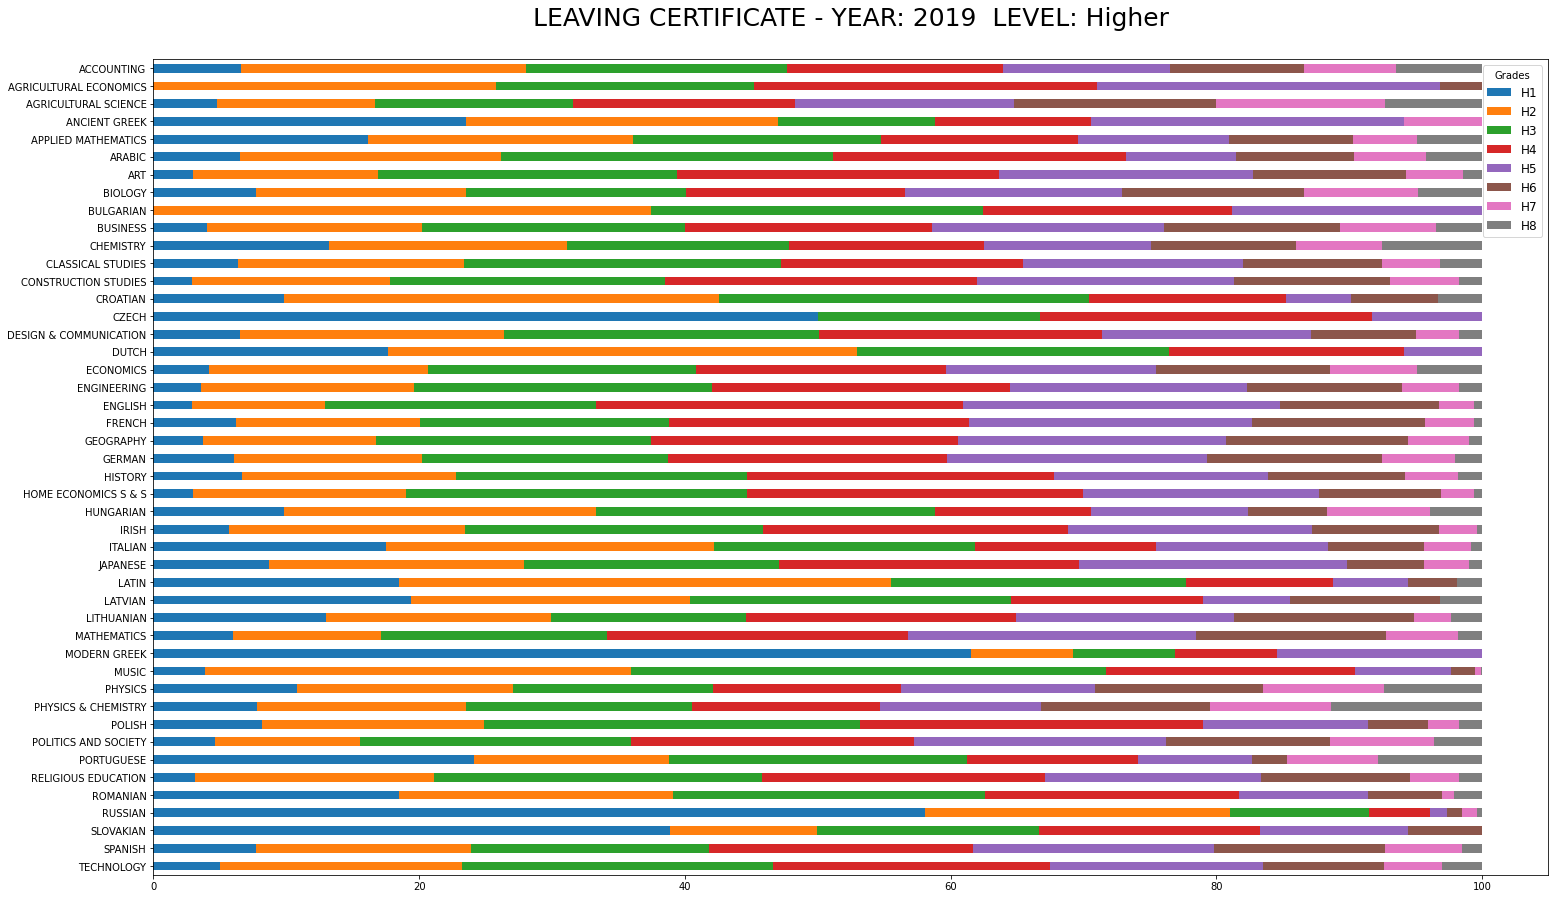

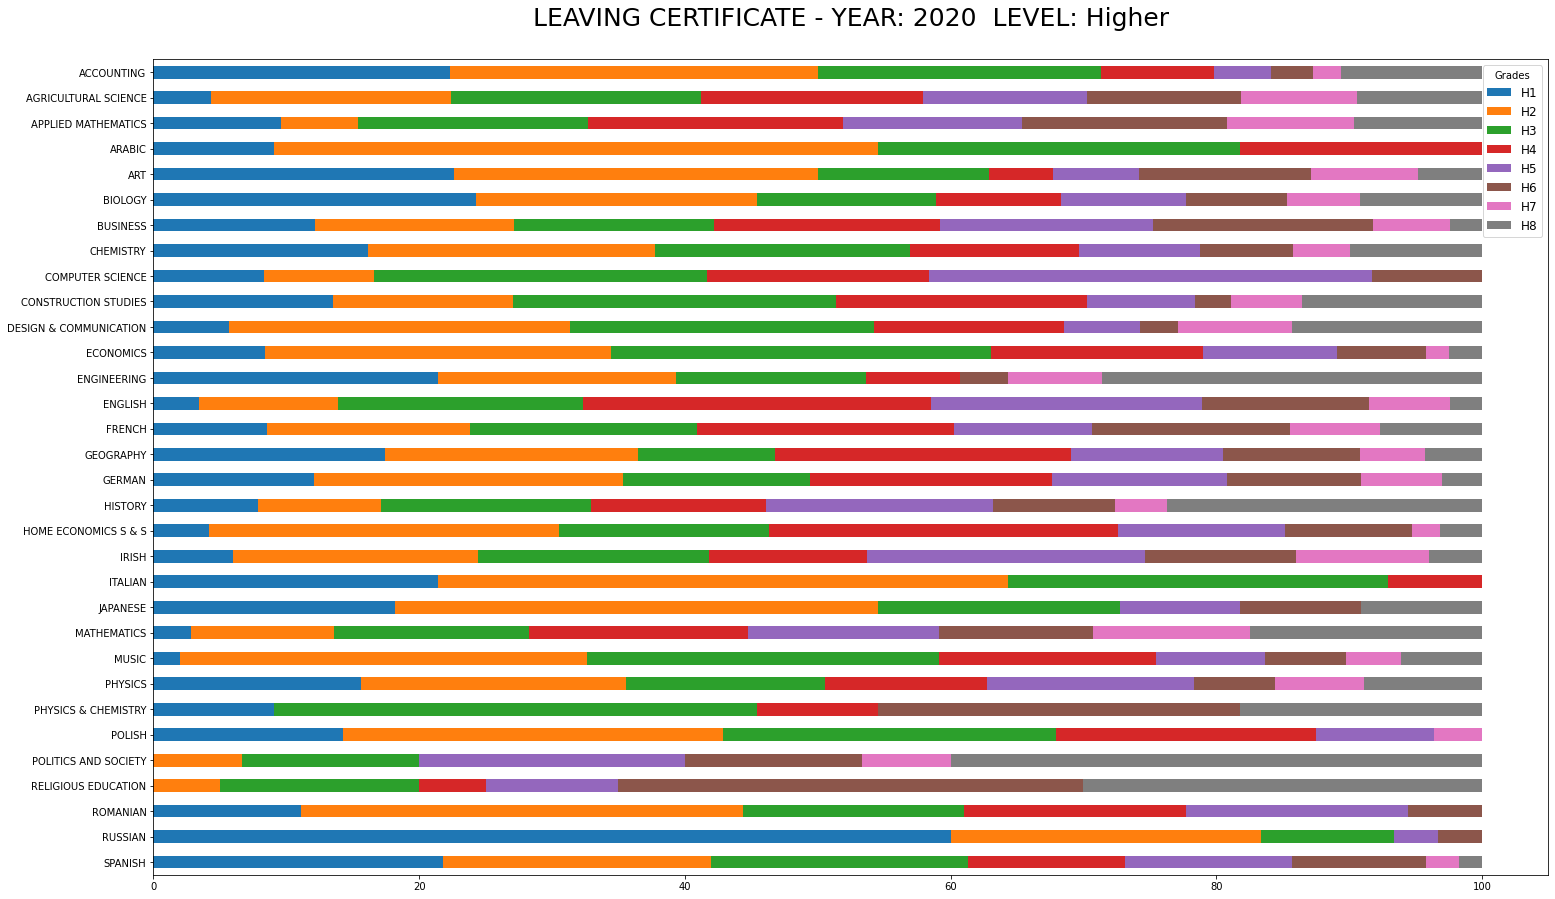

In [95]:
level = 'Higher' 

for year in years: # 2017 to 2020
    year = int(year) 
    df_year_level = df[(df['Year'] == year) & (df['Level'] == level)]
    df_year_level = df_year_level.sort_values(by=['Subject'], ascending=False)
    df_grades = df_year_level[['H1','H2','H3','H4','H5','H6','H7','H8']].apply(lambda x: x*100/sum(x), axis=1)
    df_grades.plot(kind="barh", stacked=True, figsize=(25,15))
    plt.title(f"LEAVING CERTIFICATE - YEAR: {year}  LEVEL: {level}\n",fontsize=25)
    plt.yticks(range(len(df_year_level['Subject'])),df_year_level['Subject'], ha='right')
    plt.legend(title="Grades", fontsize=12, loc='upper right')
plt.show()                

### Observing the plot above, we can say that the Russian Language has the highest number of students who scored maximum (H1), while contracting
### English, Art and Construction Studies had the lowest number of H1

## Other visualization
### Let´s check how many candidates did the English exam Higher level per year 
### Note: English is a mandatory subject

In [96]:
for year in years:
    print(f"Total English´s candidates in {year} was {df['Total'][(df['Year'] == int(year)) & (df['Level'] == 'Higher') & (df['Subject'] == 'ENGLISH')].sum():,}")

Total English´s candidates in 2017 was 38,749
Total English´s candidates in 2018 was 38,283
Total English´s candidates in 2019 was 40,217
Total English´s candidates in 2020 was 294


## Conclusion
### We can observe due coronavirus, in 2020 the number of candidates of Leaving Certificate was extremaly low.
### The students received calculated grades and the Leaving Certificate was optional.